# Ejercicio analisis de Diabetes

Realizar un analisis exploratorio de las variables y aplicar algun modelo que mejor se ajuste al caso.

En este caso se nos entrego un Dataframe que considera las siguientes variables:  
  
    Unnamed: 0            -Columna de Id  
    gender	              -Indica el genero de la persona  
    hypertension	      -Indica si la persona tiene Hipertension  
    heart_disease	      -Indica si la persona tiene Enfermedades Cardiacas  
    bmi	                  -Indica el indice de masa corporal (IMC en español)  
    diabetes	          -Indica si la persona tiene diabetes  
    Age	                  -Edad de la persona  
    Blood_glucose_level	  -Nivel de glucosa en sangre  
    HBA1c_level	          -Nivel de Hemoglobina en sangre  
    Smoking_History       -La persona es fumadora o no  

### Analisis exploratorio de variables y limpieza de variables.
En este caso se quiere desarrollar un modelo supervisado donde nuestra variable target es "diabetes". Procedemos a realizar un analisis exploratorio de las variables 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
path=r'C:\Users\danie\Desktop\Curso NTTdata\Area 3\ejercicios\docs\df_diabetes_f.csv'

datos=pd.read_csv(path,sep=',')
df=datos.copy()

df

,Unnamed: 0,gender,hypertension,heart_disease,bmi,diabetes,Age,Blood_glucose_level,HBA1c_level,Smoking_History
0,0,Female,0,1,25.19,0,80.0,140.0,NaN,never
1,1,Female,0,0,27.32,0,54.0,80.0,6.6,NaN
2,2,Male,0,0,27.32,0,28.0,158.0,NaN,never
3,3,Female,0,0,23.45,0,36.0,155.0,5.0,current
4,4,Male,1,1,20.14,0,76.0,155.0,4.8,current
...,...,...,...,...,...,...,...,...,...,...
99995,99995,Female,0,0,27.32,0,80.0,90.0,6.2,NaN
99996,99996,Female,0,0,17.37,0,2.0,100.0,6.5,NaN
99997,99997,Male,0,0,27.83,0,66.0,155.0,5.7,former
99998,99998,Female,0,0,35.42,0,24.0,100.0,NaN,never


In [3]:
datos.columns

Index(['Unnamed: 0', 'gender', 'hypertension', 'heart_disease', 'bmi',
       'diabetes', 'Age', 'Blood_glucose_level', 'HBA1c_level',
       'Smoking_History'],
      dtype='object')

In [4]:
#Procedo a eliminar la columna id ya que no me entregara información en el modelo.
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
#Verifico la precencia de duplicados
df.duplicated().sum()

4586

In [6]:
df.loc[df.duplicated()]

,gender,hypertension,heart_disease,bmi,diabetes,Age,Blood_glucose_level,HBA1c_level,Smoking_History
738,Female,0,0,27.32,0,NaN,145.0,6.1,NaN
1847,Female,0,0,27.32,0,28.0,NaN,NaN,NaN
2657,Male,0,0,27.32,0,37.0,NaN,NaN,NaN
3272,Female,0,0,27.32,0,80.0,80.0,3.5,NaN
3320,Female,0,0,27.32,0,80.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99954,Male,0,0,27.32,0,80.0,80.0,NaN,NaN
99973,Female,0,0,27.32,0,51.0,140.0,4.0,never
99985,Male,0,0,27.32,0,25.0,145.0,5.8,NaN
99989,Female,0,0,27.32,0,26.0,158.0,5.0,NaN


In [7]:
#Procedo a eliminar duplicados que no me entregaran información
df.drop_duplicates()

,gender,hypertension,heart_disease,bmi,diabetes,Age,Blood_glucose_level,HBA1c_level,Smoking_History
0,Female,0,1,25.19,0,80.0,140.0,NaN,never
1,Female,0,0,27.32,0,54.0,80.0,6.6,NaN
2,Male,0,0,27.32,0,28.0,158.0,NaN,never
3,Female,0,0,23.45,0,36.0,155.0,5.0,current
4,Male,1,1,20.14,0,76.0,155.0,4.8,current
...,...,...,...,...,...,...,...,...,...
99994,Female,0,0,24.60,0,36.0,145.0,4.8,NaN
99996,Female,0,0,17.37,0,2.0,100.0,6.5,NaN
99997,Male,0,0,27.83,0,66.0,155.0,5.7,former
99998,Female,0,0,35.42,0,24.0,100.0,NaN,never


In [8]:
#Verifico la existencia de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   diabetes             100000 non-null  int64  
 5   Age                  92993 non-null   float64
 6   Blood_glucose_level  94987 non-null   float64
 7   HBA1c_level          80250 non-null   float64
 8   Smoking_History      64184 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [9]:
#cantidad de elementos nulos
df.isnull().sum()

gender                     0
hypertension               0
heart_disease              0
bmi                        0
diabetes                   0
Age                     7007
Blood_glucose_level     5013
HBA1c_level            19750
Smoking_History        35816
dtype: int64

In [10]:
#Función que determina el porcentaje de elementos nulos y que determina la columna con cantidad de nulos mayores a 35%
def eliminacion_nulos(df):

    null_to_drop=[]
    for i in df.columns:
        null=df[i].isnull().sum()
        if null >0:
            percentage_of_null=(null*100)/len(df)
            print(i,null,round(percentage_of_null,2))
            if percentage_of_null>=35.:
                null_to_drop.append(i)
    return(null_to_drop)

In [11]:
eliminacion_nulos(df)

#no se eliminara ninguna columna con nulos considerando que la información que entrega la columna 'Smoking_History' 
#es relevante y el limite de corte es muy cercano.

Age 7007 7.01
Blood_glucose_level 5013 5.01
HBA1c_level 19750 19.75
Smoking_History 35816 35.82


['Smoking_History']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   diabetes             100000 non-null  int64  
 5   Age                  92993 non-null   float64
 6   Blood_glucose_level  94987 non-null   float64
 7   HBA1c_level          80250 non-null   float64
 8   Smoking_History      64184 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


<AxesSubplot: >

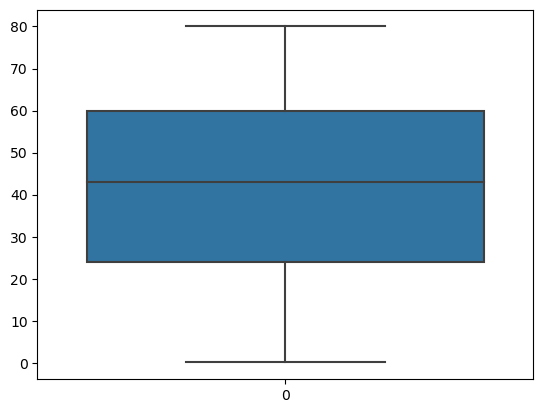

In [13]:
sns.boxplot(df.Age)

<AxesSubplot: >

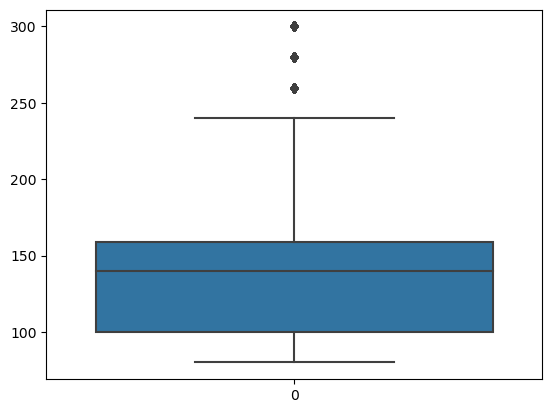

In [14]:
sns.boxplot(df.Blood_glucose_level)

<AxesSubplot: >

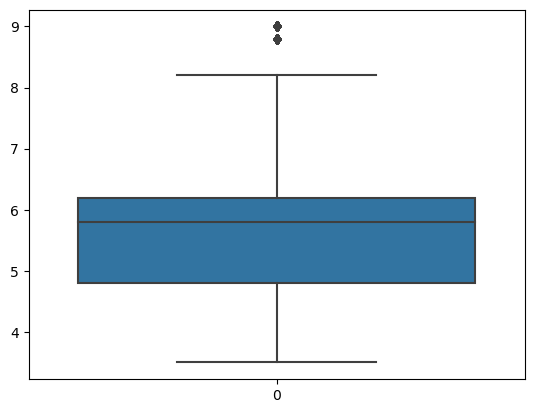

In [15]:
sns.boxplot(df.HBA1c_level)

In [16]:
#Al analizar los boxplot se determina que los valores outliers pueden ser valores reales por lo que no seran modificados.

In [17]:
#LLenado de nulos

df['Age_imp']=df.Age.fillna(df.Age.median())
df['Blood_glucose_level_imp']=df.Blood_glucose_level.fillna(df.Blood_glucose_level.mean())
df['HBA1c_level_imp']=df.HBA1c_level.fillna(df.HBA1c_level.median())
df['Smoking_History_imp']=df.Smoking_History.fillna(str(0))

df=df.drop(columns=['Age','Blood_glucose_level','HBA1c_level','Smoking_History'])

In [18]:
#sns.histplot(df.Age)

In [19]:
#Analiso las variables categoricas para su transformación

In [20]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [21]:
df.hypertension.value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [22]:
df.heart_disease.value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

In [23]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [24]:
#df.Smoking_History.value_counts(dropna=False)

In [25]:
df.head()

,gender,hypertension,heart_disease,bmi,diabetes,Age_imp,Blood_glucose_level_imp,HBA1c_level_imp,Smoking_History_imp
0,Female,0,1,25.19,0,80.0,140.0,5.8,never
1,Female,0,0,27.32,0,54.0,80.0,6.6,0
2,Male,0,0,27.32,0,28.0,158.0,5.8,never
3,Female,0,0,23.45,0,36.0,155.0,5.0,current
4,Male,1,1,20.14,0,76.0,155.0,4.8,current


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   100000 non-null  object 
 1   hypertension             100000 non-null  int64  
 2   heart_disease            100000 non-null  int64  
 3   bmi                      100000 non-null  float64
 4   diabetes                 100000 non-null  int64  
 5   Age_imp                  100000 non-null  float64
 6   Blood_glucose_level_imp  100000 non-null  float64
 7   HBA1c_level_imp          100000 non-null  float64
 8   Smoking_History_imp      100000 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


### Transformación de variables categoricas y numericas
Para el correcto ajuste del modelo debo transformar las variables. Primero transformare las variables categoricas a una representción numerica.

In [27]:
le = LabelEncoder()
df_limpio=df

le.fit(df['gender'])

df_limpio['gender_imputada']=le.transform(df['gender'])

le.fit(df.Smoking_History_imp)

df_limpio['Smoking_History_imp_imputada']=le.transform(df.Smoking_History_imp)

In [28]:
df_limpio

,gender,hypertension,heart_disease,bmi,diabetes,Age_imp,Blood_glucose_level_imp,HBA1c_level_imp,Smoking_History_imp,gender_imputada,Smoking_History_imp_imputada
0,Female,0,1,25.19,0,80.0,140.0,5.8,never,0,4
1,Female,0,0,27.32,0,54.0,80.0,6.6,0,0,0
2,Male,0,0,27.32,0,28.0,158.0,5.8,never,1,4
3,Female,0,0,23.45,0,36.0,155.0,5.0,current,0,1
4,Male,1,1,20.14,0,76.0,155.0,4.8,current,1,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,0,0,27.32,0,80.0,90.0,6.2,0,0,0
99996,Female,0,0,17.37,0,2.0,100.0,6.5,0,0,0
99997,Male,0,0,27.83,0,66.0,155.0,5.7,former,1,3
99998,Female,0,0,35.42,0,24.0,100.0,5.8,never,0,4


Ahora se transforman las variables numericas para poder estandarizarlas. En este caso se utilizara StandardScaler ya que es optimo al centrar los valores en 0 y una desviación estandar de 1

In [29]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las características numéricas
var_numericas = ['bmi', 'Age_imp', 'Blood_glucose_level_imp']
df_limpio[var_numericas] = scaler.fit_transform(df_limpio[var_numericas])

In [30]:
df_limpio.head()

,gender,hypertension,heart_disease,bmi,diabetes,Age_imp,Blood_glucose_level_imp,HBA1c_level_imp,Smoking_History_imp,gender_imputada,Smoking_History_imp_imputada
0,Female,0,1,-0.321056,0,1.751120,0.048463,5.8,never,0,4
1,Female,0,0,-0.000116,0,0.554275,-1.462686,6.6,0,0,0
2,Male,0,0,-0.000116,0,-0.642570,0.501808,5.8,never,1,4
3,Female,0,0,-0.583232,0,-0.274310,0.426251,5.0,current,0,1
4,Male,1,1,-1.081970,0,1.566990,0.426251,4.8,current,1,1


In [31]:
df_limpio.drop(columns=['gender','Smoking_History_imp'],inplace=True)

In [32]:
df_limpio

,hypertension,heart_disease,bmi,diabetes,Age_imp,Blood_glucose_level_imp,HBA1c_level_imp,gender_imputada,Smoking_History_imp_imputada
0,0,1,-0.321056,0,1.751120,0.048463,5.8,0,4
1,0,0,-0.000116,0,0.554275,-1.462686,6.6,0,0
2,0,0,-0.000116,0,-0.642570,0.501808,5.8,1,4
3,0,0,-0.583232,0,-0.274310,0.426251,5.0,0,1
4,1,1,-1.081970,0,1.566990,0.426251,4.8,1,1
...,...,...,...,...,...,...,...,...,...
99995,0,0,-0.000116,0,1.751120,-1.210828,6.2,0,0
99996,0,0,-1.499343,0,-1.839415,-0.958970,6.5,0,0
99997,0,0,0.076729,0,1.106665,0.426251,5.7,1,3
99998,0,0,1.220361,0,-0.826700,-0.958970,5.8,0,4


### Selección de variables y definición del modelo.
Luego del analisis exploratirio y la posterior limpieza de las variables puedo realizar una correlación de las variables.

<AxesSubplot: >

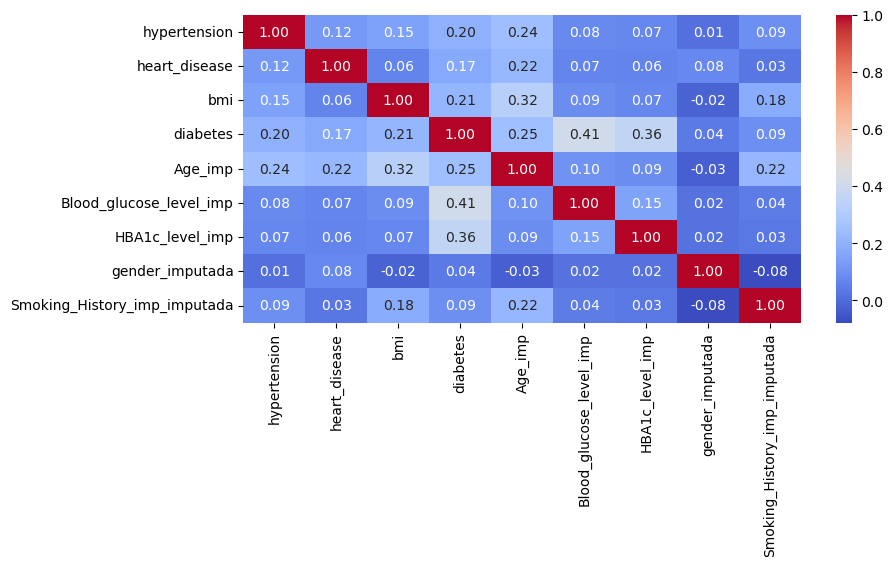

In [33]:
pearson = df_limpio.corr(method='pearson')

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(9, 4))

# Generar el mapa de calor
sns.heatmap(pearson, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

No se observa una correlación entre las columnas que componen el dataset, además todas las columnas entregan información relebante sobre los pacientes, es por esto que se decide conservar todas las columnas para este dataframe.  

Considerando que este es un modelo supervisado cuya variable a predecir es categorica/binaria presentaré como opción los siguientes modelos:  
    - LogisticRegression  
    - DecisionTreeClassifier  
    - RandomForest  
    
Debemos verificar primero que los datos esten balanceados.

In [34]:
df_limpio.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

Dado que nuestra variable objetivo no se encuentra balanceada utilizare el metodo de generar datos sinteticos utilizando SMOTE, para esto subdibidimos el dataset inicial utilizando TraineTest y luego aplico la tecnica de balanceo.

In [35]:
X = df_limpio.drop('diabetes', axis=1)
y = df_limpio['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

balanceo = SMOTE(random_state=42)
X_train_res, y_train_res = balanceo.fit_resample(X_train, y_train)

In [36]:
#Grafico de la matriz de confusión y analizo diversas metrica

def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
    print(classification_report(y_test,y_pred))


Para definir el modelo de Regresión Logística defino los parametros penalty=L2 ya que ayuda a controlar el sobreajuste, además seleccionamos class_weigth=balanced para controlar el desbalanceo de datos.

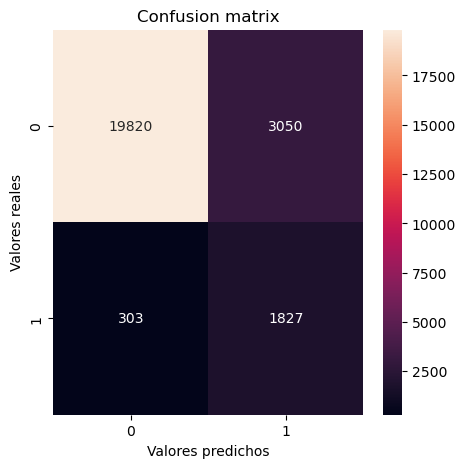

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     22870
           1       0.37      0.86      0.52      2130

    accuracy                           0.87     25000
   macro avg       0.68      0.86      0.72     25000
weighted avg       0.93      0.87      0.89     25000



In [37]:
#------Modelo LogisticRegression-------

modelo_RL = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=5000).fit(X_train_res,y_train_res)

#Predicsion del modelo a los datos balanceados
pre_y_RL = modelo_RL.predict(X_test)

#Metricas y matris de confusion
mostrar_resultados(y_test, pre_y_RL)

Para poder hacer una estimación de los hiperparametros a utilizar en el modelo DecisionTreeClassifier utilizare GridSearchCV.

In [38]:
#-----------Modelo DecisionTreeClassifier

#Definimos el modelo
modelo_DT = DecisionTreeClassifier(random_state=42)#.fit(X_train_res, y_train_res)

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [4,8,12,16]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(modelo_DT, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_res, y_train_res)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)



Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 16}
Mejor puntuación de validación cruzada:
0.9301471659624072


Luego de obtener los parametros selecciono el metodo Gini pero decido disminuir la profundidad del árbol ya que esto puede traer consigo un sobre ajuste.

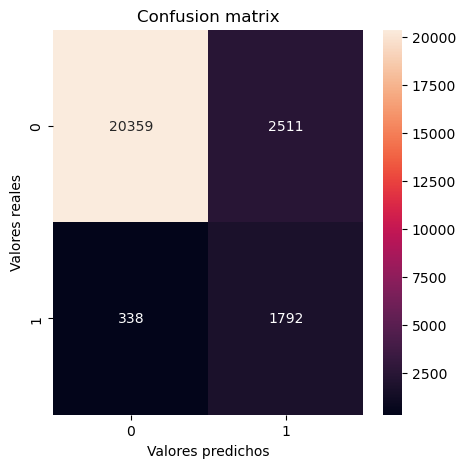

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     22870
           1       0.42      0.84      0.56      2130

    accuracy                           0.89     25000
   macro avg       0.70      0.87      0.75     25000
weighted avg       0.94      0.89      0.90     25000



In [39]:
#Predicsion del modelo a los datos balanceados
pre_y_DT = DecisionTreeClassifier(criterion='gini',max_depth=12,random_state=42).fit(X_train_res, y_train_res).predict(X_test)

#Metricas y matris de confusion
mostrar_resultados(y_test, pre_y_DT)

Basandome en el modelo DecisionTreeClassifier selexionare la misma profundidad maxima y el criterio gini, agora hare una estimación con 5 árboles de decisión

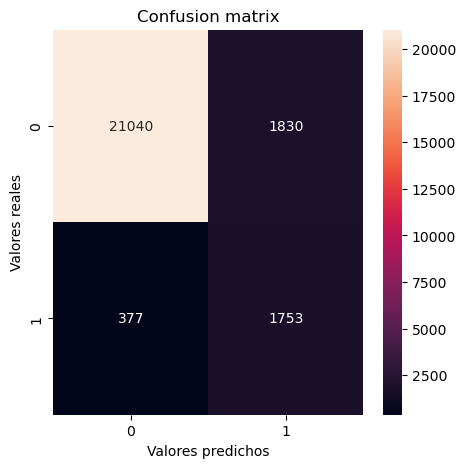

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22870
           1       0.49      0.82      0.61      2130

    accuracy                           0.91     25000
   macro avg       0.74      0.87      0.78     25000
weighted avg       0.94      0.91      0.92     25000



In [40]:
#-----------Modelo RandomForest

#Definimos el modelo
modelo_RF = RandomForestClassifier(n_estimators = 5, max_depth=12,criterion='gini',random_state=42).fit(X_train_res, y_train_res)

#Predicsion del modelo a los datos balanceados
pre_y_RF = modelo_RF.predict(X_test)

#Metricas y matris de confusion
mostrar_resultados(y_test, pre_y_RF)

Considerando las metricas F1-score podemos ver que los modelos RandomForest y DecisionTreeClassifier son bastante buenos. Ahora dependera del cliente si se le quiere dar mayor importancia a la detección de casos de diabetes o a quienes no tienen diabetes. Si consideramos que en este caso se quiere determinar los valores 0 deberiamos enfocarnos en que el valor de precisión sea mayor. En este caso El mejor modelo a elegir seria RandomForest